# Comparing Models: Logistic vs 1-Layer vs 3-Layer Neural Networks
**Dataset**: Wine Quality (UCI)  
**Dataset Details**:  
- **Source**: UCI Machine Learning Repository (Red Wine Variants)  
- **Samples**: 1,599 red wines with 11 physicochemical features  
- **Features**: Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol  
- **Target**: Binary quality classification (0=low quality ≤5, 1=high quality >5)  

**Challenge**:  
Physical-chemical properties interact nonlinearly to determine quality. Simple logistic regression assumes linear feature relationships, while neural networks (with hidden layers) can model complex interactions through activation functions like ReLU.

<h1 style="color:red;">Intructions</h1>

- Progress cell-by-cell.
- Check for **<a style="color:red;">Execute</a>s**, where codes for <a style="color:green;">green</a> tasks are already written and you are expected write codes to excute the remaining tasks.
- After completing all the coding tasks, check **<a style="color:red;">Compute</a>** challenge at the end.


In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress only ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## 1️⃣ Load Wine Quality Dataset
<h3 style="color:red;">Execute:</h3>

- <a style="color:green;">Load dataset from UCI URL</a>
- <a style="color:green;">Inspect class distribution</a>
- <a style="color:green;">Separate features (X) and labels (y)</a>
- Using `df.head()`, check the column names and first few rows of the data
- Print the shape of X and y and compare with the details provided in the above data description
- Print the correlation matrix (you can use the code from the previous tutorial)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

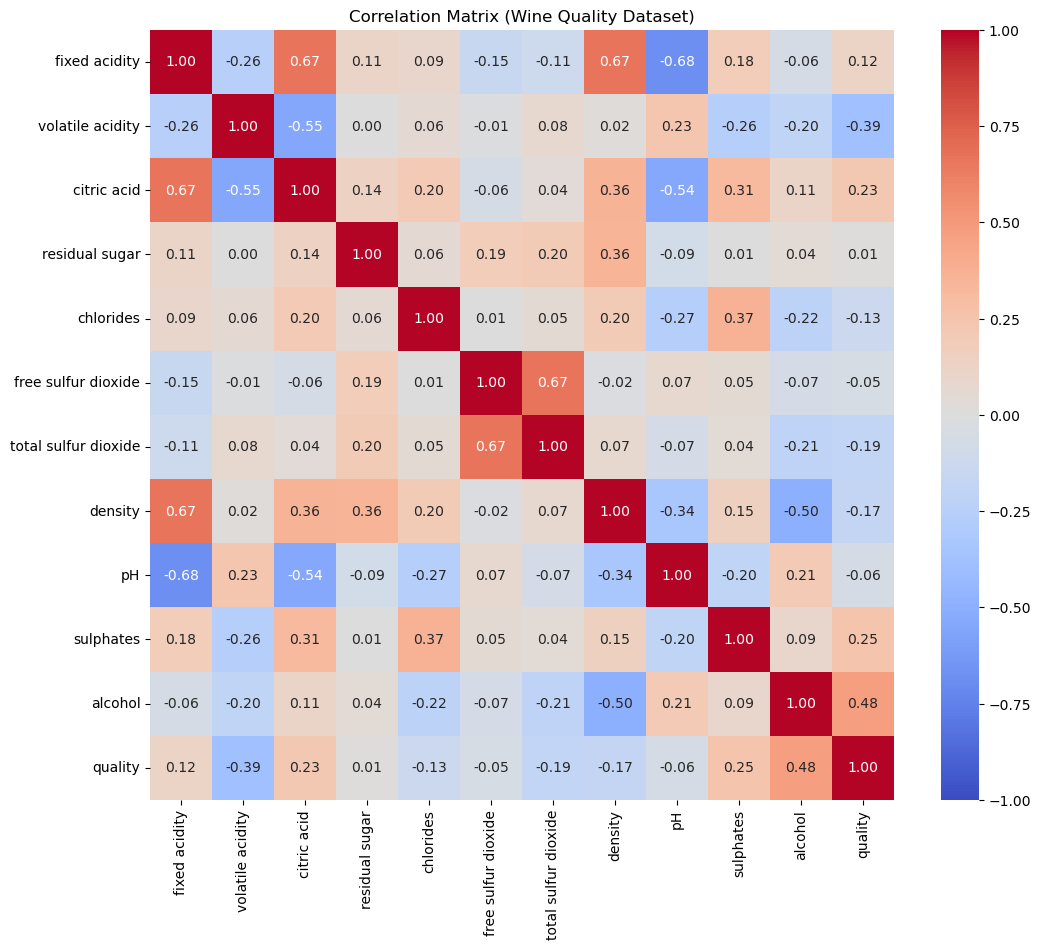

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')
X = df.drop('quality', axis=1).values
y = df['quality'].apply(lambda x: 1 if x > 5 else 0).values  # Binary classification

# Print head of the dataframe
print(df.head())

# print shapes of X and y
print(f"Features shape: {X.shape}, Labels: {np.unique(y, return_counts=True)}")

# print corr matrix
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Matrix (Wine Quality Dataset)')
plt.show()

## 2️⃣ Train/Test Split & Normalization
<h3 style="color:red;">Execute:</h3>

- Split data into 70% train / 30% test
- <a style="color:green;">Apply standardization</a>

In [11]:
# write code for splitting the data into (X_train, y_train) and (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# apply standardization 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3️⃣ Model Definitions, Training & Evaluation
<h3 style="color:red;">Execute:</h3>

- <a style="color:green;">Initialize Logistic Regression</a>
- <a style="color:green;">Initialize MLP with 1 hidden layer (50 neurons)</a>
- <a style="color:green;">Initialize MLP with 2 hidden layers (50,25 neurons)</a>

In [22]:
# Logistic regression model
log_reg = LogisticRegression(tol=1e-4, 
                             max_iter=10000, 
                             random_state=42)
# 1-layer NN classifier
mlp_1layer = MLPClassifier(hidden_layer_sizes=(32,), 
                           solver='adam', 
                           activation='relu',
                           tol=1e-4, 
                           max_iter=10000, 
                           random_state=42)
# 3-layer NN classifier
mlp_3layer = MLPClassifier(hidden_layer_sizes=(128, 64, 32), 
                           solver='adam', 
                           activation='relu',
                           tol=1e-4, 
                           max_iter=10000, 
                           random_state=42)

<h3 style="color:red;">Execute:</h3>

- <a style="color:green;">Fit models on training data</a>
- For each model, get predictions
- Compute test accuracy for each for each model using true labels and predicted labels
- Print the accuracies

In [23]:
log_reg.fit(X_train, y_train)
mlp_1layer.fit(X_train, y_train)
mlp_3layer.fit(X_train, y_train)

# get predictions
y_pred_log = log_reg.predict(X_test)
y_pred_mlp1 = mlp_1layer.predict(X_test)
y_pred_mlp3 = mlp_3layer.predict(X_test)

# Compute accuracy for each model
acc_log = accuracy_score(y_test, y_pred_log)
acc_mlp1 = accuracy_score(y_test, y_pred_mlp1)
acc_mlp3 = accuracy_score(y_test, y_pred_mlp3)

# print the accuracies
print(f"Logistic Regression Test Accuracy: {acc_log:.3f}")
print(f"1-Layer MLP Test Accuracy: {acc_mlp1:.3f}")
print(f"3-Layer MLP Test Accuracy: {acc_mlp3:.3f}")

Logistic Regression Test Accuracy: 0.735
1-Layer MLP Test Accuracy: 0.775
3-Layer MLP Test Accuracy: 0.787


## 4️⃣ Mean Performance Over 10 experiments
<h3 style="color:red;">Execute:</h3>

- Combine above tasks to compute the average performance by running 10 experimenst with different seeds

In [6]:
acc_log_list = []
acc_mlp1_list = []
acc_mlp3_list = []

for seed in range(10):

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Scale the data
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    
    # Logistic regression model
    log_reg = LogisticRegression(max_iter=5000,
                                 tol=1e-4,
                                 random_state=seed)
    # 1-layer NN classifier
    mlp_1layer = MLPClassifier(hidden_layer_sizes=(32,), 
                               solver='adam', 
                               activation='relu',
                               max_iter=100000, 
                               tol=1e-4,
                               #early_stopping=True,
                               random_state=seed)
    # 3-layer NN classifier
    mlp_3layer = MLPClassifier(hidden_layer_sizes=(128, 64, 32), 
                               solver='adam', 
                               activation='relu',
                               max_iter=100000, 
                               tol=1e-4,
                               #early_stopping=True,
                               random_state=seed)

    # fit the models
    log_reg.fit(X_train, y_train)
    mlp_1layer.fit(X_train, y_train)
    mlp_3layer.fit(X_train, y_train)

    # get predictions
    y_pred_log = log_reg.predict(X_test)
    y_pred_mlp1 = mlp_1layer.predict(X_test)
    y_pred_mlp3 = mlp_3layer.predict(X_test)

    # Compute accuracy for each model
    acc_log = accuracy_score(y_test, y_pred_log)
    acc_mlp1 = accuracy_score(y_test, y_pred_mlp1)
    acc_mlp3 = accuracy_score(y_test, y_pred_mlp3)

    # print the accuracies for each experiment
    print("\n-------- Experiment: ", seed+1)
    print(f"Logistic Regression Test Accuracy: {acc_log:.3f}")
    print(f"1-Layer MLP Test Accuracy: {acc_mlp1:.3f}")
    print(f"3-Layer MLP Test Accuracy: {acc_mlp3:.3f}")

    # collect the accuracies
    acc_log_list.append(acc_log)
    acc_mlp1_list.append(acc_mlp1)
    acc_mlp3_list.append(acc_mlp3)

# print mean accuracies 
print("\n-------- Final mean results ---------")
print("Logistic Regression Mean Test Accuracy: ", np.mean(acc_log_list))
print("1-Layer MLP Mean Test Accuracy: ", np.mean(acc_mlp1_list))
print("3-Layer MLP Mean Test Accuracy: ", np.mean(acc_mlp3_list))


-------- Experiment:  1
Logistic Regression Test Accuracy: 0.746
1-Layer MLP Test Accuracy: 0.746
3-Layer MLP Test Accuracy: 0.733

-------- Experiment:  2
Logistic Regression Test Accuracy: 0.748
1-Layer MLP Test Accuracy: 0.758
3-Layer MLP Test Accuracy: 0.773

-------- Experiment:  3
Logistic Regression Test Accuracy: 0.723
1-Layer MLP Test Accuracy: 0.735
3-Layer MLP Test Accuracy: 0.773

-------- Experiment:  4
Logistic Regression Test Accuracy: 0.750
1-Layer MLP Test Accuracy: 0.777
3-Layer MLP Test Accuracy: 0.787

-------- Experiment:  5
Logistic Regression Test Accuracy: 0.721
1-Layer MLP Test Accuracy: 0.771
3-Layer MLP Test Accuracy: 0.756

-------- Experiment:  6
Logistic Regression Test Accuracy: 0.752
1-Layer MLP Test Accuracy: 0.765
3-Layer MLP Test Accuracy: 0.767

-------- Experiment:  7
Logistic Regression Test Accuracy: 0.740
1-Layer MLP Test Accuracy: 0.735
3-Layer MLP Test Accuracy: 0.740

-------- Experiment:  8
Logistic Regression Test Accuracy: 0.742
1-Layer ML

## 5️⃣ Parameter Count Challenge
<h3 style="color:red;">Compute the number of parameters:</h3>

Compute the number of learnable paramters in each one of the above three models. **Note** that `MLPClassifier` uses `sigmoid` function instead of `softmax` for binary classification.

- *Logistic Regression:*  The number of parameters is 
  $$
  (d + 1) = (11 + 1) = 12,
  $$
  where $d$ is the number of features. 
- Above 1-Layer MLP:
  $$
  (d \times H1 + H1) + (H1 \times K + K) = (11 \times 32 + 32) + (32 \times 1 + 1) = 417
  $$
- Above 3-Layer MLP:
  $$
  (d\times H1 + H1) + (H1 \times H2 + H2) + (H2 \times H3 + H3) + (H3 \times 1 + 1) = 11,905
  $$

In [36]:
# Verify parameter for LogisticRegression
print("Log Reg Params:    ", 
      [log_reg.coef_.shape, 
      log_reg.intercept_.shape])

# Verify parameters for MLPClassifier
print("1-Layer MLP Params:", 
      [w.shape for w in mlp_1layer.coefs_], 
      [b.shape for b in mlp_1layer.intercepts_])

print("3-Layer MLP Params:", 
      [w.shape for w in mlp_3layer.coefs_], 
      [b.shape for b in mlp_3layer.intercepts_])

Log Reg Params:     [(1, 11), (1,)]
1-Layer MLP Params: [(11, 32), (32, 1)] [(32,), (1,)]
3-Layer MLP Params: [(11, 128), (128, 64), (64, 32), (32, 1)] [(128,), (64,), (32,), (1,)]
